In [1]:
import os

os.chdir('..')

import numpy as np
import json

import plotly.io as pio

from apps.data import *

pio.templates.default = "plotly_dark"
pio.renderers.default = "browser"

In [2]:
UNDER_OVER = 56.064

In [3]:
with open('C:/Users/jrnas/Downloads/BBGM_League_1_2220_free_agency.json', encoding='latin') as f:
    r_json = json.load(f)

In [4]:
df = player_json_to_df(r_json)

In [5]:
df['vorp_norm'] = (df['vorp'] / df['min']) * (32 * 82)

In [7]:
test_df = df[(df['min'] > 10) & (~df['vorp_norm'].isna())].reset_index(drop=True)
test_df['vorp_norm_wt'] = test_df['vorp_norm'] * test_df['min']
agg_df = test_df.groupby('ovr')[['vorp_norm_wt', 'min']].sum().reset_index()
agg_df['vorp_norm'] = agg_df['vorp_norm_wt'] / agg_df['min']

In [8]:
model_df_under = agg_df[agg_df['ovr'] <= UNDER_OVER].reset_index(drop=True)
poly_under = np.polyfit(model_df_under['ovr'], model_df_under['vorp_norm'], 1)

model_df_over = agg_df[agg_df['ovr'] > UNDER_OVER].reset_index(drop=True)
poly_over = np.polyfit(model_df_over['ovr'], model_df_over['vorp_norm'], 1)

df['vorp_under'] = np.polyval(poly_under, df['ovr'])
df['vorp_over'] = np.polyval(poly_over, df['ovr'])
df['vorp_pred'] = np.where(
    df['ovr'] <= UNDER_OVER,
    df['vorp_under'],
    df['vorp_over']
)

np.save('models/poly_under.npy', poly_under)
np.save('models/poly_over.npy', poly_over)

In [41]:
df['cvorp'] = df['vorp'].clip(0, )
df['vorp_pct'] = df['vorp_pred'].clip(0, ) / df[df.season.between(2024,2220)].groupby('season').vorp.sum().mean()
df['vorp_pct_cap'] = df['vorp_pct'] * 30

<Axes: xlabel='season'>

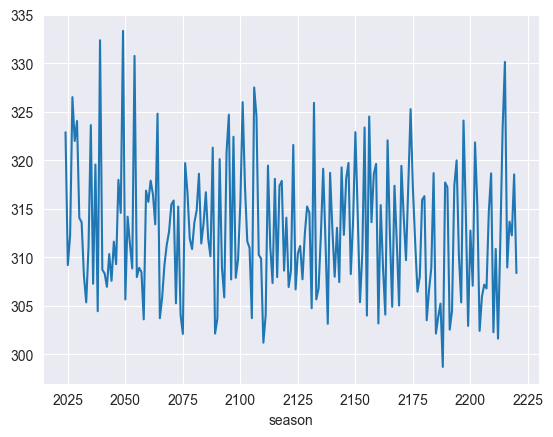

In [45]:
df[df.season.between(2024,2220)].groupby('season').vorp.sum().plot()

In [43]:
df[df.lastName == 'Doncic'][['season', 'ovr', 'vorp', 'vorp_pred', 'vorp_pct', 'vorp_pct_cap']]

,season,ovr,vorp,vorp_pred,vorp_pct,vorp_pct_cap
146,2019,62,3.4,3.146469,0.010060,0.301795
147,2020,70,5.4,6.649367,0.021259,0.637776
148,2021,70,5.0,6.649367,0.021259,0.637776
149,2022,69,5.9,6.211505,0.019859,0.595778
150,2023,71,6.6,7.087229,0.022659,0.679774
151,2024,71,9.289674,7.087229,0.022659,0.679774
152,2025,73,9.794585,7.962953,0.025459,0.763769
153,2026,72,8.550574,7.525091,0.024059,0.721771
154,2027,70,8.879463,6.649367,0.021259,0.637776
155,2028,70,10.127315,6.649367,0.021259,0.637776
